# Lab 3: Linear Regression

In this assignment, we will learn the Linear Regression model. 

First, please study the given example, which uses linear regression for the house price prediction task. In this example, you will learn how to preprocess data, how to train the model, and how to evaluate the model. 

Based on the given example and Lab Assignment 2, your task is to use the linear regression model to predict the medical cost for the dataset given in Lab Assignment 2. 

## 1. Example: Linear Regression for House Price Prediction

In this example, we use the house price dataset. It gives the attributes and price of each house. The task is to build a linear regression model to make prediction for the price of the house.

### 1.1 Preprocess the raw data

When given a new dataset, we need to deal with the missing values and categorical features. 

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv('housing.csv')

# 0. fill in missing values
mean_val = df['total_bedrooms'].mean()
df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_val)
print(df.isnull().sum())

# 1. convert categorical features to numerical values
labelencoder = LabelEncoder()
df['ocean_proximity'] = labelencoder.fit_transform(df['ocean_proximity'])
print(df.info())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(4), int32(1), int64(5)
memory usag

### 1.2 Split the preprocessed dataset into training set and testing set

For the supervised learning, we need to split the dataset into the training set and test set. The training set is used to learn model parameters and the testing set is used to evaluate the learned model. 

Note that the testing set is NOT allowed to be used in the training phase. 

In [51]:
# 2. split samples
house_fea = df.drop('median_house_value', axis=1).values
house_price = df['median_house_value'].values
house_price = house_price / np.max(house_price)

X_train,X_test,y_train,y_test = train_test_split(house_fea,
                                                 house_price,
                                                 test_size=0.2,
                                                 random_state=42)
print(X_train.shape)
print(X_test.shape)


# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(16512, 9)
(4128, 9)


### 1.3 Train the linear regression model 

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$



Here, we use the training set to learn the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$. 

Then, we compute MAE, MSE, and RMSE to see how well the learned model fit the training set. 

In [52]:
#3. train the model
lr = LinearRegression()

lr.fit(X_train,y_train)

print("bias is "+str(lr.intercept_))
print("coefficients  is "+str(lr.coef_))

y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


bias is 0.41438855869860675
coefficients  is [-0.17170955 -0.18189176  0.02984855 -0.0353864   0.09753502 -0.08776816
  0.03520256  0.15428789 -0.00090304]
prediction for training set:
MAE is: 0.10125365457873203
MSE is: 0.0192437559440504
RMSE is: 0.13872186541439818


### 1.4 Evaluate the linear regression model

After obtaining the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$, the linear regression model is determined. Then, we need to evaluate this model to see how well this model generaizes on the testing set. 

prediction for testing set:
MAE is: 0.10369354831097968
MSE is: 0.020220019584503243
RMSE is: 0.1421971152467702


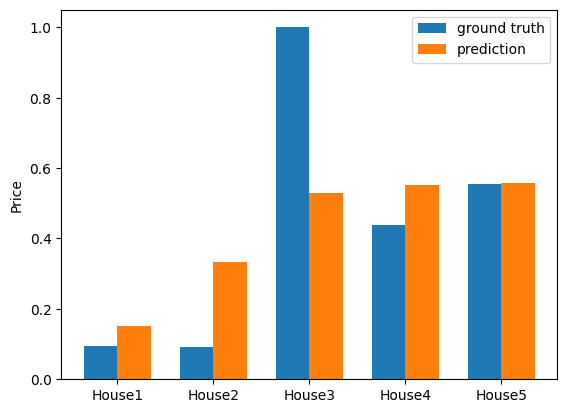

In [53]:
#4. evaluate the model
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


labels = ['House1', 'House2', 'House3', 'House4', 'House5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


## 2. Task: Linear Regression for Medical Cost Prediction

Following the given example, build a linear regression model for [the insurance dataset](./insurance.csv) to predict the medical cost.  


### 2.1 Preprocess the raw data

Based on your Lab Assignment 2, deal with the missing values and categorical features. 

In [85]:
# your code
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('lab02_001_Lieu_insurance_output.csv')

# check for missing values and non-numerical categorial features
print(df.head())
print(df.isnull().sum())

   Unnamed: 0  age     bmi  children      charges  sex  smoker  \
0           0   19  27.900         0  16884.92400    0       1   
1           1   18  33.770         1   1725.55230    1       0   
2           2   28  33.000         3   4449.46200    1       0   
3           3   33  22.705         0  21984.47061    1       0   
4           4   32  28.880         0   3866.85520    1       0   

   region_northeast  region_northwest  region_southeast  region_southwest  
0               0.0               0.0               0.0               1.0  
1               0.0               0.0               1.0               0.0  
2               0.0               0.0               1.0               0.0  
3               0.0               1.0               0.0               0.0  
4               0.0               1.0               0.0               0.0  
Unnamed: 0          0
age                 0
bmi                 0
children            0
charges             0
sex                 0
smoker         

### 1.2 Split the preprocessed dataset into training set and testing set

Use 80% of samples as the training set and 20% of samples as the testing set

In [91]:
# your code
# split samples into training and testing sets
insurance_fea = df.drop('charges', axis=1).values
insurance_cost = df['charges'].values
insurance_cost = insurance_cost / np.max(insurance_cost)

X_train, X_test, y_train, y_test = train_test_split(insurance_fea,
                                                   insurance_cost,
                                                   test_size=0.2,
                                                   random_state=42)

print(X_train.shape)
print(X_test.shape)

# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(1070, 10)
(268, 10)


### 1.3 Train the linear regression model 

Use the Linear regression model to do prediction

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$

Please output the learned model parameter $\mathbf{w}$ and see how the learned model fit the training set. 

In [56]:
lr = LinearRegression()

lr.fit(X_train, y_train)

print("bias is " + str(lr.intercept_))
print("coefficients is " + str(lr.coef_))

y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred, y_train)
mse = mean_squared_error(y_train_pred, y_train)
rmse = np.sqrt(mse)

print("\npredicition for training set:")
print("MAE is: {}".format(mae))
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(rmse))

bias is 0.20913875871323698
coefficients is [ 3.14778490e-03  5.68037747e-02  3.19283671e-02  8.08656565e-03
 -6.48543645e-05  1.49827073e-01 -3.52890502e+11 -3.47903462e+11
 -3.59672431e+11 -3.51557243e+11]

predicition for training set:
MAE is: 0.06587579880999786
MSE is: 0.009156969424956396
RMSE is: 0.09569205518200764


### 1.4 Evaluate the linear regression model


Evaluate the learned model to see how well this model generaizes on the testing set. 

prediction for testing set:
MAE is: 0.06584333982563875
MSE is: 0.008315095587723987
RMSE is: 0.09118714595667521


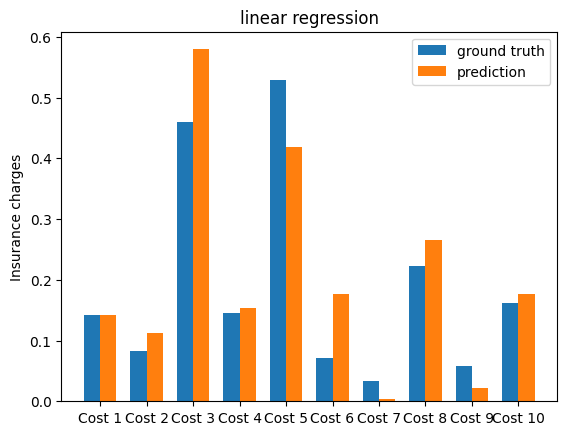

In [92]:
# your code
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred, y_test)
mse = mean_squared_error(y_test_pred, y_test)
rmse = np.sqrt(mse)

print("prediction for testing set:")
print("MAE is: {}".format(mae))
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(rmse))

labels = []
coef_len = len(lr.coef_)
for i in range(coef_len):
    labels.append("Cost " + str(i+1))

x = np.arange(coef_len)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:coef_len], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:coef_len], width, label='prediction')

ax.set_ylabel('Insurance charges')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.title("linear regression")
plt.show()

### 1.5 Use the ridge regression model to do prediction

$\min_{w}\frac{1}{n}\|y-Xw\|_2^2 + \lambda \|w\|_2^2$

* 1.5.1 Compare its performance on the testing set with that of the standard linear regression model $\min_{w}\frac{1}{n}\|y-Xw\|_2^2$

* 1.5.2 Use different $\lambda$ to see how it affects the performance of the ridge regression  model on the testing set


alpha is 200
bias is 0.20928336460705027
coefficinets are [ 0.00284566  0.04730491  0.02728534  0.00752057  0.00140507  0.12562489
  0.0023278  -0.00023955  0.00030016 -0.00240666]

predicition for training set:
MAE is: 0.07102763470441822
MSE is: 0.009833213941340383
RMSE is: 0.0991625632047719

prediction for testing set:
MAE is: 0.07211091805781392
MSE is: 0.009344588751791134
RMSE is: 0.0966674130810954


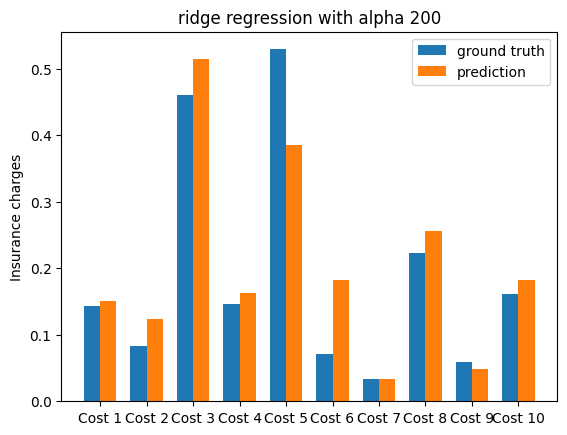

In [74]:
# your code

# train model
a = 200
lr = Ridge(alpha=a)
lr.fit(X_train, y_train)

print("alpha is {}".format(a))
print("bias is " + str(lr.intercept_))
print("coefficinets are " + str(lr.coef_))

# prediction for training set
y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred, y_train)
mse = mean_squared_error(y_train_pred, y_train)
rmse = np.sqrt(mse)

print("\npredicition for training set:")
print("MAE is: {}".format(mae))
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(rmse))

# prediction for testing set
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred, y_test)
mse = mean_squared_error(y_test_pred, y_test)
rmse = np.sqrt(mse)

print("\nprediction for testing set:")
print("MAE is: {}".format(mae))
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(rmse))

# graphing the predictions
labels = []
coef_len = len(lr.coef_)
for i in range(coef_len):
    labels.append("Cost " + str(i+1))

x = np.arange(coef_len)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:coef_len], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:coef_len], width, label='prediction')

ax.set_ylabel('Insurance charges')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.title("ridge regression with alpha {}".format(a))
plt.show()

alpha is 0.1
bias is 0.20928336460705027
coefficinets are [ 3.15120637e-03  5.67917924e-02  3.19942323e-02  7.98121649e-03
 -7.05290000e-05  1.49794799e-01  3.11925988e-03  5.92087904e-04
 -1.33318584e-03 -2.35306323e-03]

predicition for training set:
MAE is: 0.06590453620866515
MSE is: 0.00915675675224359
RMSE is: 0.09569094394060282

prediction for testing set:
MAE is: 0.06581833736152362
MSE is: 0.008313350752741288
RMSE is: 0.09117757812500445


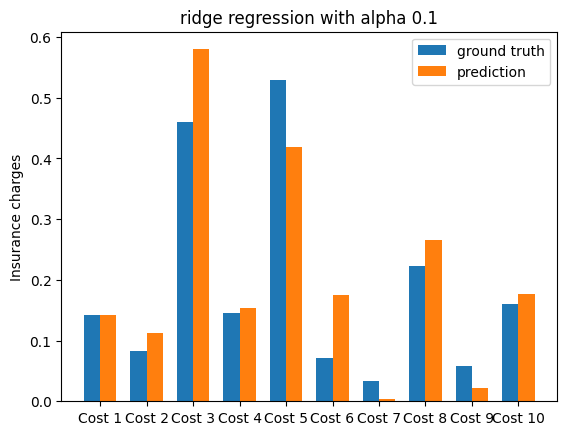

In [75]:
# your code

# train model
a = 0.1
lr = Ridge(alpha=a)
lr.fit(X_train, y_train)

print("alpha is {}".format(a))
print("bias is " + str(lr.intercept_))
print("coefficinets are " + str(lr.coef_))

# prediction for training set
y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred, y_train)
mse = mean_squared_error(y_train_pred, y_train)
rmse = np.sqrt(mse)

print("\npredicition for training set:")
print("MAE is: {}".format(mae))
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(rmse))

# prediction for testing set
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred, y_test)
mse = mean_squared_error(y_test_pred, y_test)
rmse = np.sqrt(mse)

print("\nprediction for testing set:")
print("MAE is: {}".format(mae))
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(rmse))

# graphing the predictions
labels = []
coef_len = len(lr.coef_)
for i in range(coef_len):
    labels.append("Cost " + str(i+1))

x = np.arange(coef_len)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:coef_len], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:coef_len], width, label='prediction')

ax.set_ylabel('Insurance charges')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.title("ridge regression with alpha {}".format(a))
plt.show()

alpha is 1e-06
bias is 0.20928336460705027
coefficinets are [ 3.15136421e-03  5.67974915e-02  3.19970272e-02  7.98139500e-03
 -7.15743339e-05  1.49809242e-01  3.11975107e-03  5.92645899e-04
 -1.33428187e-03 -2.35300104e-03]

predicition for training set:
MAE is: 0.06590270383174184
MSE is: 0.009156756510954824
RMSE is: 0.09569094267983164

prediction for testing set:
MAE is: 0.06581555637137843
MSE is: 0.008313159228098962
RMSE is: 0.09117652783528753


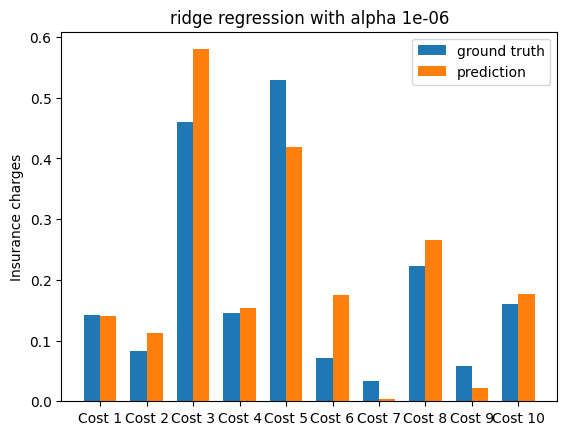

In [80]:
# your code

# train model
a = 0.000001
lr = Ridge(alpha=a)
lr.fit(X_train, y_train)

print("alpha is {}".format(a))
print("bias is " + str(lr.intercept_))
print("coefficinets are " + str(lr.coef_))

# prediction for training set
y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred, y_train)
mse = mean_squared_error(y_train_pred, y_train)
rmse = np.sqrt(mse)

print("\npredicition for training set:")
print("MAE is: {}".format(mae))
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(rmse))

# prediction for testing set
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred, y_test)
mse = mean_squared_error(y_test_pred, y_test)
rmse = np.sqrt(mse)

print("\nprediction for testing set:")
print("MAE is: {}".format(mae))
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(rmse))

# graphing the predictions
labels = []
coef_len = len(lr.coef_)
for i in range(coef_len):
    labels.append("Cost " + str(i+1))

x = np.arange(coef_len)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:coef_len], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:coef_len], width, label='prediction')

ax.set_ylabel('Insurance charges')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.title("ridge regression with alpha {}".format(a))
plt.show()

alpha is 20000
bias is 0.20928336460705035
coefficinets are [ 2.19788817e-04  2.70336027e-03  1.86395113e-03  6.74894196e-04
  5.16198279e-04  7.46526830e-03  6.85326672e-06 -2.99296386e-04
  5.95525165e-04 -3.19965495e-04]

predicition for training set:
MAE is: 0.13552694694703227
MSE is: 0.03288696452015471
RMSE is: 0.1813476344487424

prediction for testing set:
MAE is: 0.1444199389432707
MSE is: 0.03532941623546009
RMSE is: 0.18796120939028907


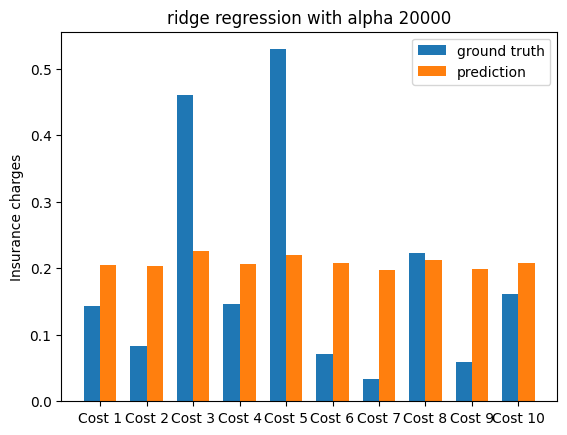

In [77]:
# your code

# train model
a = 20000
lr = Ridge(alpha=a)
lr.fit(X_train, y_train)

print("alpha is {}".format(a))
print("bias is " + str(lr.intercept_))
print("coefficinets are " + str(lr.coef_))

# prediction for training set
y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred, y_train)
mse = mean_squared_error(y_train_pred, y_train)
rmse = np.sqrt(mse)

print("\npredicition for training set:")
print("MAE is: {}".format(mae))
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(rmse))

# prediction for testing set
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred, y_test)
mse = mean_squared_error(y_test_pred, y_test)
rmse = np.sqrt(mse)

print("\nprediction for testing set:")
print("MAE is: {}".format(mae))
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(rmse))

# graphing the predictions
labels = []
coef_len = len(lr.coef_)
for i in range(coef_len):
    labels.append("Cost " + str(i+1))

x = np.arange(coef_len)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:coef_len], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:coef_len], width, label='prediction')

ax.set_ylabel('Insurance charges')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.title("ridge regression with alpha {}".format(a))
plt.show()

alpha is 0.5
bias is 0.20928336460705027
coefficinets are [ 3.15057503e-03  5.67690074e-02  3.19830579e-02  7.98050161e-03
 -6.63515984e-05  1.49737054e-01  3.11728246e-03  5.89844111e-04
 -1.32881924e-03 -2.35332525e-03]

predicition for training set:
MAE is: 0.06591188431247492
MSE is: 0.009156762538470503
RMSE is: 0.09569097417452967

prediction for testing set:
MAE is: 0.06582945549749993
MSE is: 0.008314121551702436
RMSE is: 0.09118180493773106


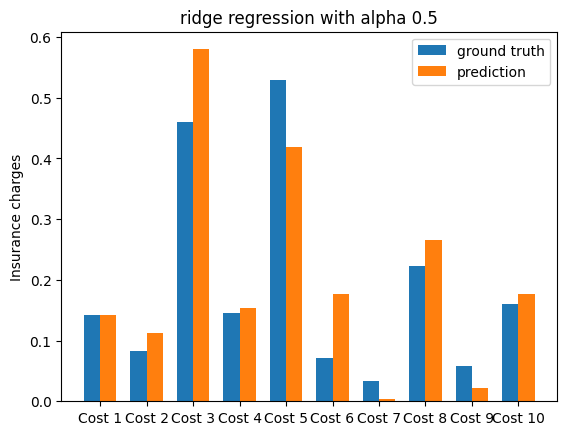

In [81]:
# your code

# train model
a = 0.5
lr = Ridge(alpha=a)
lr.fit(X_train, y_train)

print("alpha is {}".format(a))
print("bias is " + str(lr.intercept_))
print("coefficinets are " + str(lr.coef_))

# prediction for training set
y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred, y_train)
mse = mean_squared_error(y_train_pred, y_train)
rmse = np.sqrt(mse)

print("\npredicition for training set:")
print("MAE is: {}".format(mae))
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(rmse))

# prediction for testing set
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred, y_test)
mse = mean_squared_error(y_test_pred, y_test)
rmse = np.sqrt(mse)

print("\nprediction for testing set:")
print("MAE is: {}".format(mae))
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(rmse))

# graphing the predictions
labels = []
coef_len = len(lr.coef_)
for i in range(coef_len):
    labels.append("Cost " + str(i+1))

x = np.arange(coef_len)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:coef_len], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:coef_len], width, label='prediction')

ax.set_ylabel('Insurance charges')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.title("ridge regression with alpha {}".format(a))
plt.show()

alpha is 1
bias is 0.20928336460705027
coefficinets are [ 3.14978589e-03  5.67405519e-02  3.19691018e-02  7.97960621e-03
 -6.11387785e-05  1.49664936e-01  3.11481342e-03  5.87043497e-04
 -1.32336875e-03 -2.35365163e-03]

predicition for training set:
MAE is: 0.0659211063582694
MSE is: 0.009156780597531526
RMSE is: 0.09569106853584365

prediction for testing set:
MAE is: 0.06584333982563875
MSE is: 0.008315095587723987
RMSE is: 0.09118714595667521


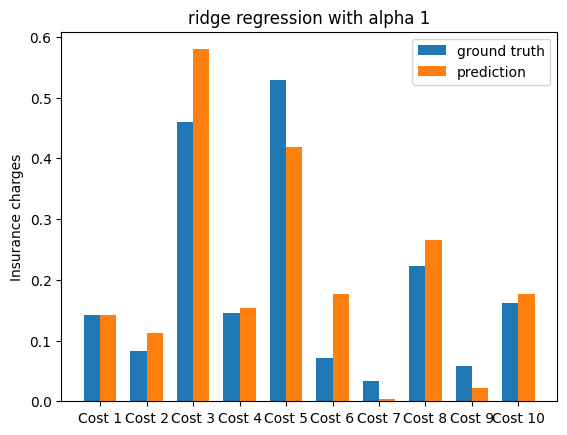

In [82]:
# your code

# train model
a = 1
lr = Ridge(alpha=a)
lr.fit(X_train, y_train)

print("alpha is {}".format(a))
print("bias is " + str(lr.intercept_))
print("coefficinets are " + str(lr.coef_))

# prediction for training set
y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred, y_train)
mse = mean_squared_error(y_train_pred, y_train)
rmse = np.sqrt(mse)

print("\npredicition for training set:")
print("MAE is: {}".format(mae))
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(rmse))

# prediction for testing set
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred, y_test)
mse = mean_squared_error(y_test_pred, y_test)
rmse = np.sqrt(mse)

print("\nprediction for testing set:")
print("MAE is: {}".format(mae))
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(rmse))

# graphing the predictions
labels = []
coef_len = len(lr.coef_)
for i in range(coef_len):
    labels.append("Cost " + str(i+1))

x = np.arange(coef_len)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:coef_len], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:coef_len], width, label='prediction')

ax.set_ylabel('Insurance charges')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.title("ridge regression with alpha {}".format(a))
plt.show()